# Using Python for Research Homework: Week 2

In this homework, we will use the tools we've covered in the past two weeks to create a tic-tac-toe (noughts and crosses) simulator and evaluate basic winning strategies.

### Exercise 1

Tic-tac-toe (or noughts and crosses) is a simple strategy game in which two players take turns placing a mark on a 3x3 board, attempting to make a row, column, or diagonal of three with their mark. In this homework, we will use the tools we've covered in the past two weeks to create a tic-tac-toe simulator and evaluate basic winning strategies.

In the following exercises, we will learn to create a tic-tac-toe board, place markers on the board, evaluate if either player has won, and use this to simulate two basic strategies.

#### Instructions 

- For our tic-tac-toe board, we will use a numpy array with dimension 3 by 3. 
- Make a function `create_board()` that creates such a board with the value of each cell set to the integer `0`.
- Call `create_board()` and store it.

In [1]:
# write your code here!
import numpy as np
def create_board(dim):
    """
    Argument:
    dim: tuple 
      References the dimensions of the board
    """
    zero_matrix = np.zeros((dim), dtype=int)
    return zero_matrix

In [2]:
zero_mx = create_board((3,3))
zero_mx

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

### Exercise 2

Players 1 and 2 will take turns changing values of this array from a 0 to a 1 or 2, indicating the number of the player who places a marker there.

#### Instructions 

- Create a function `place(board, player, position)`, where:
    - `player` is the current player (an integer 1 or 2).
    - `position` is a tuple of length 2 specifying a desired location to place their marker.
    - Your function should only allow the current player to place a marker on the board (change the board position to their number) if that position is empty (zero).
- Use `create_board()` to store a board as `board`, and use `place` to have Player 1 place a marker on location `(0, 0)`.

In [3]:
# write your code here!
def place(board, player, position):
    """
    Arguments:
    board: numpy matrix
      board to play
    player: int
      is the current player (an integer 1 or 2).
    position: tuple
      is a tuple of length 2 specifying a desired location to place their marker.
    """
    dim_board = board.shape
    # the position has to be inside the board and there has to be a 0
    if position[0] <= dim_board[0] and position[1] <= dim_board[1] and board[position] == 0:
        board[position] = player
    elif position[0] <= dim_board[0] and position[1] <= dim_board[1] and board[position] != 0:
        print("The position", position, "is already used and its value is", board[position])
    elif position[0] <= dim_board[0] or position[1] <= dim_board[1]:
        print("This position is outside the board, the board dimensions are:", dim_board)
    return board

In [4]:
# test the function
place(board=zero_mx, player=1, position=(0,0))

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [5]:
# test the function
place(board=zero_mx, player=2, position=(0,0))

The position (0, 0) is already used and its value is 1


array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [6]:
# test the function
place(board=zero_mx, player=2, position=(4,0))

This position is outside the board, the board dimensions are: (3, 3)


array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

### Exercise 3

In this exercise, we will determine which positions are available to either player for placing their marker.

#### Instructions 
- Create a function `possibilities(board)` that returns a list of all positions (tuples) on the board that are not occupied (0). (Hint: `numpy.where` is a handy function that returns a list of indices that meet a condition.)
- `board` is already defined from previous exercises. Call `possibilities(board)` to see what it returns!

In [7]:
# write your code here!
def possibilities(board):
    """
    Returns a list of all positions (tuples) on the board that are not occupied (0).
    """
    empty_positions = []
    empty_pos = np.where(board == 0)
    if len(empty_pos) == 0:
        pass
    else:
        for i in range(len(empty_pos[0])):
            x = empty_pos[0][i]
            y = empty_pos[1][i]
            empty_positions.append((x,y))
    return empty_positions

In [8]:
zero_mx

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [9]:
possibilities(zero_mx)

[(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [10]:
matrix_full = np.array([[1, 2, 2],
       [2, 1, 2],
       [1, 2, 1]])

In [11]:
possibilities(matrix_full)

[]

### Exercise 4

The next step is for the current player to place a marker among the available positions. In this exercise, we will select an available board position at random and place a marker there.

#### Instructions 

- Write a function `random_place(board, player)` that places a marker for the current player at random among all the available positions (those currently set to 0).
    - Find possible placements with `possibilities(board)`.
    - Select one possible placement at random using `random.choice(selection)`.
- `board` is already defined from previous exercises. Call `random_place(board, player)` to place a random marker for Player 2, and store this as board to update its value.

In [12]:
import random 
random.seed(1)

# write your code here!
def random_place(board, player):
    """
    Places a marker for the current player at random among all the available positions (those currently set to 0).
    """
    available_positions = possibilities(board)
    if len(available_positions) > 0:
        pos_selected = random.choice(available_positions)
        place(board, player, pos_selected)
    elif len(available_positions) == 0:
        print("There are no possitions available")
    return board

In [13]:
random_place(zero_mx, 2)

array([[1, 0, 0],
       [2, 0, 0],
       [0, 0, 0]])

In [14]:
random_place(board=matrix_full, player=1)

There are no possitions available


array([[1, 2, 2],
       [2, 1, 2],
       [1, 2, 1]])

### Exercise 5

We will now have both players place three markers each.

#### Instructions 

- A new `board` is already given. Call `random_place(board, player)` to place three pieces each on board for players 1 and 2.
- Print board to see your result.

In [15]:
random.seed(1)
board = create_board((3,3))

# write your code here!
for i in range(3):
    for player in [1, 2]:
        random_place(board, player)
board

array([[2, 2, 1],
       [0, 1, 0],
       [0, 1, 2]])

### Exercise 6

In the next few exercises, we will make functions that check whether either player has won the game.

#### Instructions 
- Make a function `row_win(board, player)` that takes the player (integer) and determines if any row consists of only their marker. 
    - Have it return `True` if this condition is met and `False` otherwise.
- `board` is already defined from previous exercises. Call `row_win` to check if Player 1 has a complete row.

In [16]:
board

array([[2, 2, 1],
       [0, 1, 0],
       [0, 1, 2]])

In [17]:
# write your code here!
def row_win(board, player):
    """
    takes the player (integer) and determines if any row consists of only their marker. 
    Returns True or False.
    """
    if np.any(np.all(board==player, axis=1)):
        return True
    else:
        return False

In [18]:
row_win(board, 1)

False

In [19]:
array_row = np.array([[2, 2, 2],
       [0, 2, 0],
       [0, 1, 2]])
row_win(array_row, 2)

True

### Exercise 7

In the next few exercises, we will make functions that verify if either player has won the game.

#### Instructions 
- Make a function `col_win(board, player)` that takes the player (integer) and determines if any column consists of only their marker. 
    - Have it return `True` if this condition is met and `False` otherwise.
- `board` is already defined from previous exercises. Call `col_win` to check if Player 1 has a complete row.

In [20]:
# write your code here! 
def col_win(board, player):
    """
    takes the player (integer) and determines if any column consists of only their marker. 
    Returns True or False.
    """
    if np.any(np.all(board==player, axis=0)):
        return True
    else:
        return False

In [21]:
col_win(board, 1)

False

### Exercise 8

In the next few exercises, we will make functions that verify if either player has won the game.

#### Instructions 
- Finally, create a function `diag_win(board, player)` that tests if either diagonal of the board consists of only their marker. Have it return `True` if this condition is met, and `False` otherwise.
- `board` has been slightly modified from a previous exercise. Call `diag_win` to check if Player 2 has a complete diagonal.

In [22]:
board[1,1] = 2

# write your code here!
def diag_win(board, player):
    """
    takes the player (integer) and determines if any diagonal consists of only their marker. 
    Returns True or False.
    """
    if np.all(np.diag(board)==player) or np.all(np.diag(np.fliplr(board))==player):
    # np.diag returns the diagonal of the array
    # np.fliplr rearranges columns in reverse order
        return True
    else:
        return False

In [23]:
diag_win(board,2)

True

### Exercise 9

In the next few exercises, we will make functions that check whether either player has won the game.

#### Instructions 
- Create a function `evaluate(board)` that uses `row_win`, `col_win`, and `diag_win` functions for both players. If one of them has won, return that player's number. If the board is full but no one has won, return -1. Otherwise, return 0.
- `board` is already defined from previous exercises. Call evaluate to see if either player has won the game yet.

In [66]:
def evaluate(board):
    winner = 0
    for player in [1, 2]:
        if row_win(board, player) or col_win(board,player) or diag_win(board,player) == True:
            winner = player
            print("The winner is player ", winner)
        pass
    if np.any(board == 0) and winner == 0:
        print("There is no winner yet")
    elif np.all(board != 0) and winner == 0:
        winner = -1
        print("There is a draw")
    return winner

In [67]:
evaluate(board)

The winner is player  2


2

In [68]:
board2 = np.array([[0, 2, 1],
       [0, 0, 0],
       [2, 2, 1]])

In [69]:
evaluate(board2)

There is no winner yet


0

In [70]:
board3 = np.array([[2, 2, 1],
       [1, 1, 2],
       [2, 2, 1]])

In [71]:
evaluate(board3)

There is a draw


-1

### Exercise 10

In this exercise, we will use all the functions we have made to simulate an entire game.

#### Instructions 

- `create_board()`, `random_place(board, player)`, and `evaluate(board)` have been created in previous exercises. Create a function `play_game()` that:
    - Creates a board.
    - Alternates taking turns between two players (beginning with Player 1), placing a marker during each turn.
    - Evaluates the board for a winner after each placement.
    - Continues the game until one player wins (returning 1 or 2 to reflect the winning player), or the game is a draw (returning -1).
- Call play_game 1000 times, and store the results of the game in a list called `results`.

In [30]:
# Functions without prints
def place(board, player, position):
    """
    Arguments:
    board: numpy matrix
      board to play
    player: int
      is the current player (an integer 1 or 2).
    position: tuple
      is a tuple of length 2 specifying a desired location to place their marker.
    """
    dim_board = board.shape
    # the position has to be inside the board and there has to be a 0
    if position[0] <= dim_board[0] and position[1] <= dim_board[1] and board[position] == 0:
        board[position] = player
    elif position[0] <= dim_board[0] and position[1] <= dim_board[1] and board[position] != 0:
        pass
  #   print("The position", position, "is already used and its value is", board[position])
    elif position[0] <= dim_board[0] or position[1] <= dim_board[1]:
        pass
  #   print("This position is outside the board, the board dimensions are:", dim_board)
    return board

def random_place(board, player):
    """
    Places a marker for the current player at random among all the available positions (those currently set to 0).
    """
    available_positions = possibilities(board)
    if len(available_positions) > 0:
        pos_selected = random.choice(available_positions)
        place(board, player, pos_selected)
    elif len(available_positions) == 0:
        pass
    #   print("There are no possitions available")
    return board

def evaluate(board):
    winner = 0
    for player in [1, 2]:
        if row_win(board, player) or col_win(board,player) or diag_win(board,player) == True:
            winner = player
        # print("The winner is player ", winner)
          pass
    if np.any(board == 0) and winner == 0:
        winner = 0
        # print("There is no winner yet")
    elif np.all(board != 0) and winner == 0:
        winner = -1
        # print("There is a draw")
    return winner

In [31]:
random.seed(1)

# write your code here! 
def play_game(dim):
    """
    Arguments:
    -----------
    dim : tuple
    dimensions of the board
    """
    board = create_board(dim)
    evaluation = evaluate(board)
    while evaluation == 0:
        for player in [1,2]:
            random_place(board, player)
            evaluation = evaluate(board)
    return evaluation

In [32]:
play_game((3,3))

1

In [33]:
import tqdm.notebook as tq

In [61]:
random.seed(1)
results = []
for i in tq.tqdm(range(1000)):
    r = play_game((3,3))
    results.append(r)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [62]:
results.count(1)

503

In [63]:
from collections import Counter
winner_counts = Counter(results)
winner_counts = dict(winner_counts)
winner_counts

{1: 503, 2: 376, -1: 121}

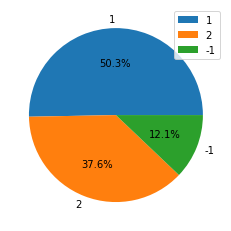

In [64]:
import matplotlib.pyplot as plt
plt.pie(winner_counts.values(), labels = winner_counts.keys(),autopct='%1.1f%%')
plt.legend()
plt.show()

#### Exercise 11

In the previous exercise, we see that when guessing at random, it's better to go first, as expected. Let's see if Player 1 can improve their strategy. 

#### Instructions 
- Create a function `play_strategic_game()`, where Player 1 always starts with the middle square, and otherwise both players place their markers randomly.
- Call `play_strategic_game` 1000 times.

In [59]:
random.seed(1)

# write your code here
def play_strategic_game(dim):
    """
    Arguments:
    -----------
    dim : tuple
    dimensions of the board
    """
    board = create_board(dim)
    board = place(board, player=1, position=(1,1))
    evaluation = evaluate(board)
    while evaluation == 0:
        for player in [1,2]:
            random_place(board, player)
            evaluation = evaluate(board)
    return evaluation

  0%|          | 0/1000 [00:00<?, ?it/s]

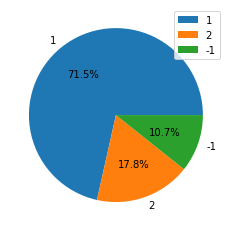

In [65]:
random.seed(1)
results_improved = []
for i in tq.tqdm(range(1000)):
    r = play_strategic_game((3,3))
    results_improved.append(r)

winner_counts_improved = Counter(results_improved)
winner_counts_improved = dict(winner_counts_improved)
plt.pie(winner_counts_improved.values(), labels = winner_counts_improved.keys(),autopct='%1.1f%%')
plt.legend()
plt.show()